## Prepare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/DL_project

/content/drive/MyDrive/DL_project


In [ ]:
! git clone https://github.com/Masao-Taketani/StarGAN-tf2

Cloning into 'StarGAN-tf2'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 205 (delta 117), reused 129 (delta 49), pack-reused 0
Receiving objects: 100% (205/205), 7.11 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
cd StarGAN-tf2

/content/drive/MyDrive/DL_project/StarGAN-tf2


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 679 kB 9.2 MB/s 


## Download Dataset and Create TFRecords

In [ ]:
# Download Dataset
!bash downloadd.sh afhq-dataset

Streaming output truncated to the last 5000 lines.
  inflating: ./data/afhq/train/wild/flickr_wild_001384.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001385.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001386.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001387.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001388.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001389.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001390.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001391.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001392.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001393.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001394.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001395.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001396.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001399.jpg  
  inflating: ./data/afhq/train/wild/flickr_wild_001400.jpg  
  inflating: ./data/afhq/train/wil

In [ ]:
# Change in the location of images an create list_attr_celeba.txt file
from os import listdir
import os
import shutil
my_str = ""
n = 1
for folder in listdir('data/afhq/train/'):
  for filename in listdir('data/afhq/train/' + folder):
    n += 1
    shutil.move(str("data/afhq/train/" + folder + "/" + filename), str("data/afhq/train/" + filename))
    if folder == 'cat':
      my_str += str(filename + " 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n")
    elif folder == "dog":
      my_str += str(filename + " -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n")
    elif folder == "wild":
      my_str += str(filename + " -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n")


      


In [ ]:
f = open("data/afhq/list_attr_celeba.txt", "a")
f.write(str(n) + "\n")
f.write("Brown_Hair Blond_Hair Black_Hair 5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Blurry Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young \n")
f.write(my_str)
f.close()

In [ ]:
os.rename("data/afhq/train", "data/afhq/images")

In [ ]:
os.rename("data/afhq", "data/celeba")

In [ ]:
# cerate TFRecords
!python data_loader.py

2021-07-26 02:07:01.202933: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
train len: 12631
test len: 1999
2021-07-26 02:07:03.686361: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-26 02:07:03.739096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-26 02:07:03.739693: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-26 02:07:03.739736: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-26 02:07:03.913855: I tensorflow/

## Train

In [ ]:
# Train model for 20 epoches
!python train.py

2021-07-26 02:07:52.871325: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-26 02:07:54.865369: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-26 02:07:54.893569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-26 02:07:54.894211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-26 02:07:54.894252: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-26 02:07:54.909657: I tensorflow/stream_executor/platform/default

## Test

In [ ]:
# test model
from utils import get_models_for_testing, test_image

In [ ]:
# Load trained models
gen, _ = get_models_for_testing()

Check Generator's model architecture
Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf.reshape (TFOpLambda)         (None, 1, 1, 5)      0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.cast (TFOpLambda)            (None, 1, 1, 5)      0           tf.reshape[0][0]                 
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
_____________________________________________________

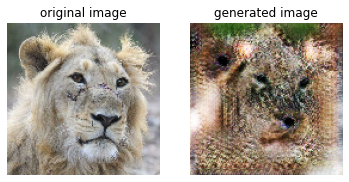

In [ ]:
img_path = "data/celeba/images/flickr_wild_001384.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

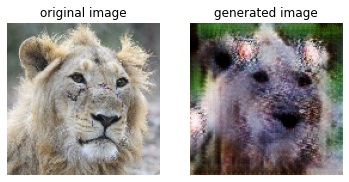

In [ ]:
img_path = "data/celeba/images/flickr_wild_001384.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

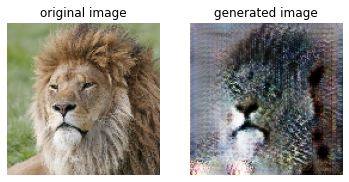

In [ ]:
img_path = "data/celeba/images/pixabay_wild_001110.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

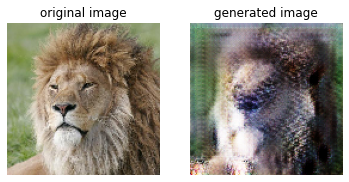

In [ ]:
img_path = "data/celeba/images/pixabay_wild_001110.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

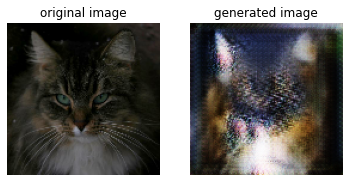

In [ ]:
img_path = "data/celeba/images/flickr_cat_000002.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

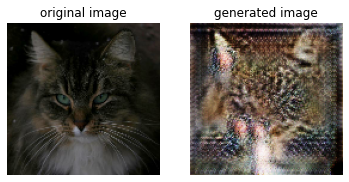

In [ ]:
img_path = "data/celeba/images/flickr_cat_000002.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

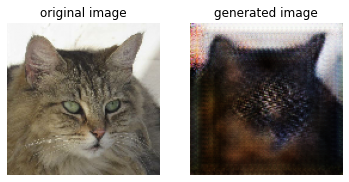

In [ ]:
img_path = "data/celeba/images/flickr_cat_000792.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

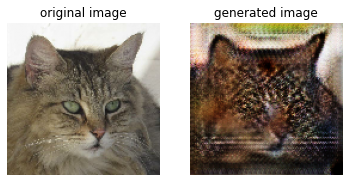

In [ ]:
img_path = "data/celeba/images/flickr_cat_000792.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

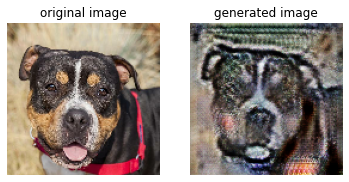

In [ ]:
img_path = "data/celeba/images/flickr_dog_000134.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

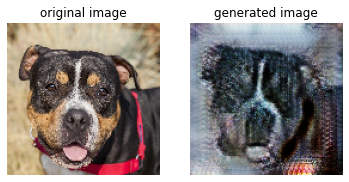

In [ ]:
img_path = "data/celeba/images/flickr_dog_000134.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

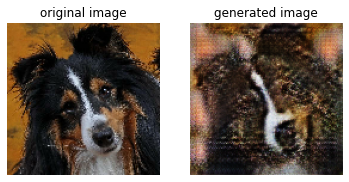

In [ ]:
img_path = "data/celeba/images/flickr_dog_000292.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

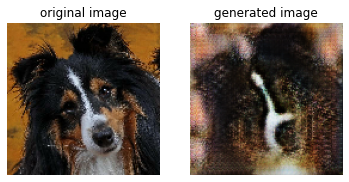

In [ ]:
img_path = "data/celeba/images/flickr_dog_000292.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)